In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [51]:
cars = pd.read_csv("data/used_car_sales.csv")
initial_count = len(cars)

# Rename Columns
cars = cars.rename(columns={"pricesold":"SalePrice", "yearsold":"YearSold", "BodyType":"VehicleClass", "DriveType":"Drive", "NumCylinders":"Cylinders", "zipcode":"Zip"})
cars = cars.set_index(cars.ID)

print(f"Dataset has {initial_count} rows\n")
print(cars.dtypes)

Dataset has 122144 rows

ID               int64
SalePrice        int64
YearSold         int64
Zip             object
Mileage          int64
Make            object
Model           object
Year             int64
Trim            object
Engine          object
VehicleClass    object
Cylinders        int64
Drive           object
dtype: object


In [52]:
# Dropping rows with null data in columns of interest
cars = cars.dropna(subset=["ID", "SalePrice", "YearSold", "Mileage", "Make", "Model", "Year", "Engine", "VehicleClass", "Drive"])
count1 = len(cars)
print(f"Dropped {initial_count-count1} rows with null values\n")

# Remove duplicate rows based on some columns
cars = cars.drop_duplicates(subset=["SalePrice","YearSold","Mileage","Make","Year"])
count2 = len(cars)
print(f"Dropped {count1 - count2} duplicate rows\n")

# String formatting
string_columns = cars.select_dtypes(["object"])
cars[string_columns.columns] = string_columns.apply(lambda x: x.str.strip()).apply(lambda x: x.str.upper())
cars.describe()

Dropped 42159 rows with null values

Dropped 47 duplicate rows



,ID,SalePrice,YearSold,Mileage,Year,Cylinders
count,79938.000000,79938.000000,79938.000000,7.993800e+04,7.993800e+04,7.993800e+04
mean,84701.838750,10866.223698,2019.372526,9.314208e+05,3.496387e+03,2.686986e+04
std,47707.302068,13604.708975,0.502736,2.675838e+07,1.731962e+05,7.595445e+06
min,1.000000,0.000000,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,43980.250000,3000.000000,2019.000000,4.700000e+04,1.986000e+03,4.000000e+00
50%,85272.500000,6600.000000,2019.000000,9.241750e+04,2.002000e+03,6.000000e+00
75%,125657.750000,14100.000000,2020.000000,1.431702e+05,2.009000e+03,8.000000e+00
max,165801.000000,404990.000000,2020.000000,1.234568e+09,2.014000e+07,2.147484e+09


In [53]:
# Removing some numerical values that don't make sense - based on above .describe()
cars = cars[cars["SalePrice"] > 100]
cars = cars[cars["Mileage"] > 10]
cars = cars[cars["Mileage"] < 1000000]
cars = cars[cars["Year"] > 1900]
cars = cars[cars["Year"] < 2021]
cars = cars[cars["Cylinders"] > 1]
cars = cars[cars["Cylinders"] < 20]
count3 = len(cars)
print(f"Dropped {count2 - count3} numerical values")

# Removing some nonsense string values - by inspection of some data
cars = cars[~cars["Make"].str.contains("OTHER")]
cars = cars[~cars["Make"].str.contains("REPLICA")]

count4 = len(cars)
print(f"Dropped {count3 - count4} nonsense strings")

Dropped 14947 numerical values
Dropped 136 nonsense strings


In [54]:

cars.describe()

,ID,SalePrice,YearSold,Mileage,Year,Cylinders
count,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000,64855.000000
mean,82233.044684,10785.587387,2019.344337,106151.105512,1995.826814,6.562023
std,47209.447081,13041.553873,0.496266,96687.938581,18.162099,1.653189
min,1.000000,110.000000,2018.000000,11.000000,1909.000000,2.000000
25%,42308.000000,3000.000000,2019.000000,49114.500000,1985.000000,6.000000
50%,81949.000000,6680.000000,2019.000000,93196.000000,2002.000000,6.000000
75%,121856.500000,14200.000000,2020.000000,143269.500000,2009.000000,8.000000
max,165801.000000,365000.000000,2020.000000,999999.000000,2020.000000,16.000000


array([[<Axes: title={'center': 'Mileage'}>]], dtype=object)

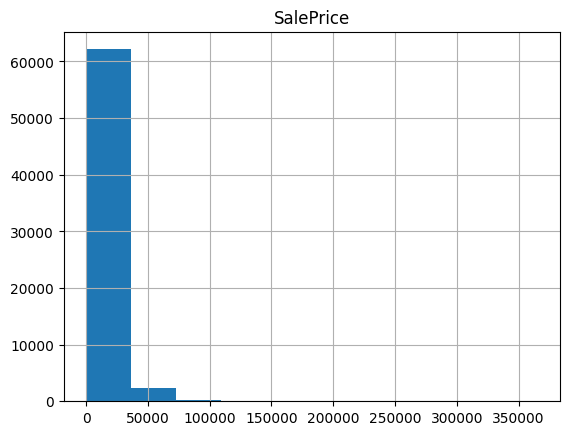

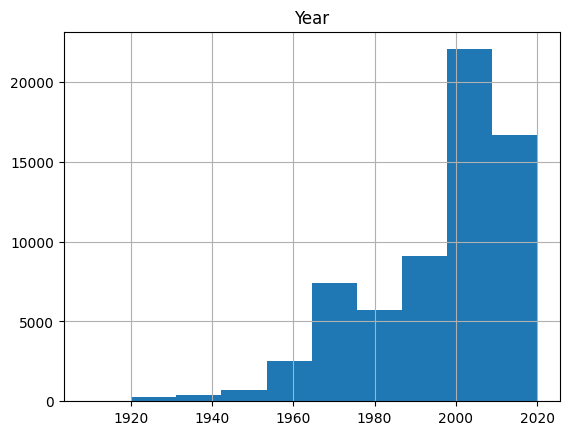

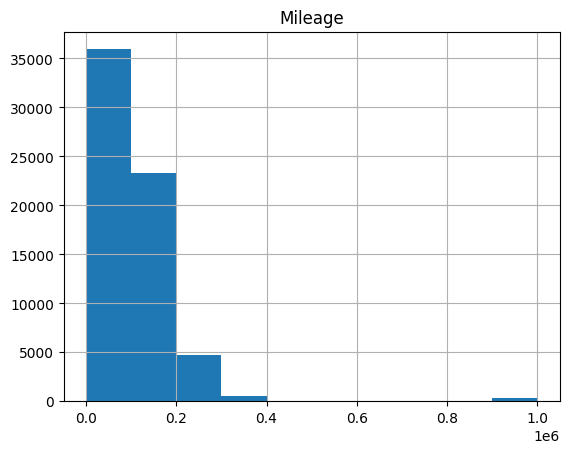

In [55]:
# Histograms for numerical data columns
cars.hist(column=["SalePrice"])
cars.hist(column=["Year"])
cars.hist(column=["Mileage"])

<Axes: xlabel='Mileage', ylabel='SalePrice'>

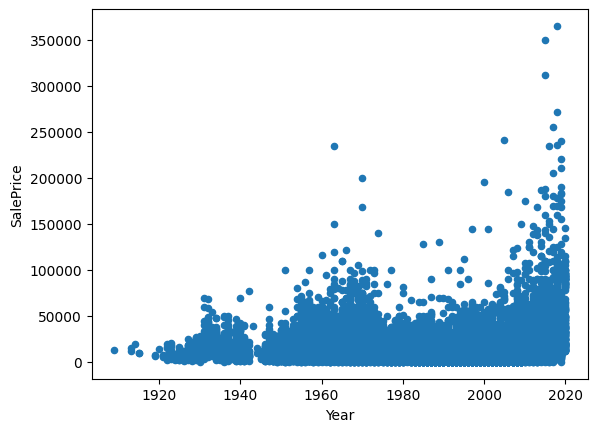

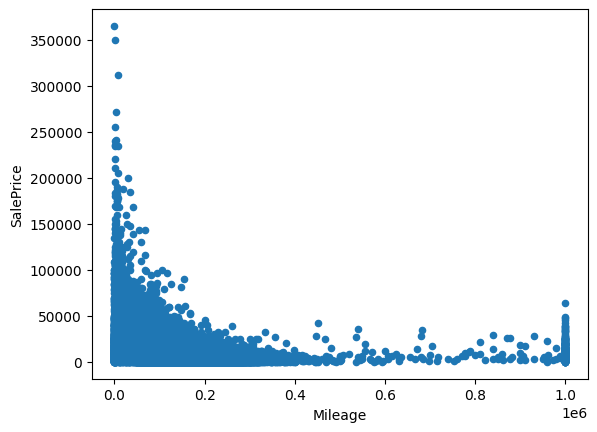

In [56]:
# Scatter Plots on numerical data
cars.plot.scatter(x="Year", y="SalePrice")
cars.plot.scatter(x="Mileage", y="SalePrice")

<Axes: xlabel='Age', ylabel='SalePrice'>

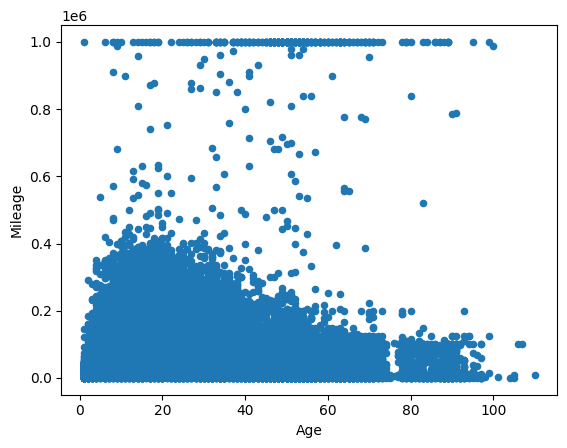

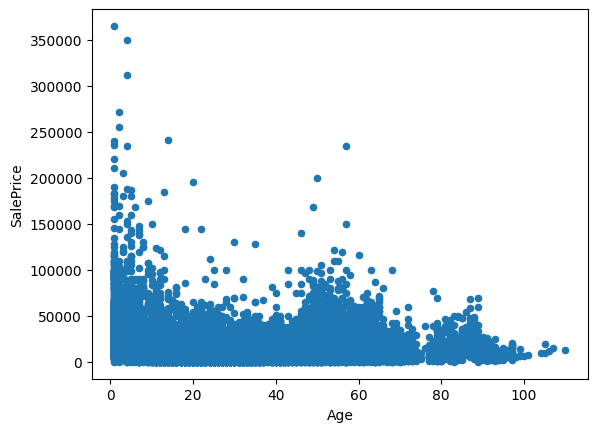

In [57]:
def format_age(n):
    if n < 1:
        return 1
    else:
        return n
cars = cars.assign(Age=lambda df: df.YearSold-df.Year)
cars.Age = cars.Age.apply(format_age, True)
cars.plot.scatter(x="Age", y="Mileage")
cars.plot.scatter(x="Age", y="SalePrice")

<Axes: xlabel='MilesPerYear', ylabel='SalePrice'>

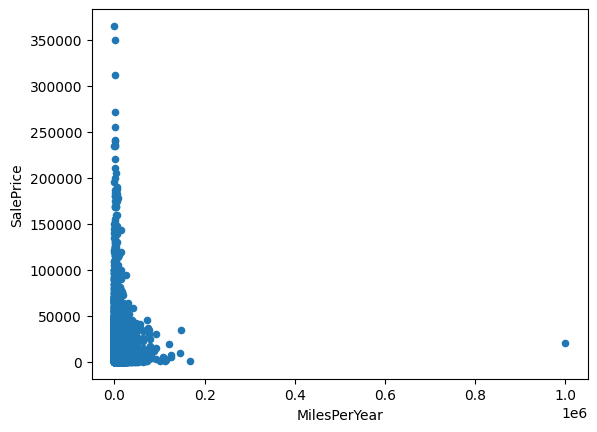

In [58]:
# New feature - average mileage per year
cars = cars.assign(e=lambda df: df.Mileage/df.Age).rename(columns={"e":"MilesPerYear"})
cars.plot.scatter(x="MilesPerYear", y="SalePrice")

In [59]:
# Investigate extreme values
highestMPY = cars[cars["MilesPerYear"] == cars["MilesPerYear"].max()]
highestPrice = cars[cars["SalePrice"] == cars["SalePrice"].max()]

print(highestMPY)
print()
print(highestPrice)

          ID  SalePrice  YearSold    Zip  Mileage  Make  Model  Year  \
ID                                                                     
33270  33270      20300      2019  46173   999999  FORD  F-150  2018   

                                               Trim   Engine     VehicleClass  \
ID                                                                              
33270  F150 SUPER CREW XLT 4X4 5'5 BED FX4 OFF ROAD  5.0L V8  CREW CAB PICKUP   

       Cylinders             Drive  Age  MilesPerYear  
ID                                                     
33270          8  4X4 FX4 OFF ROAD    1      999999.0  

          ID  SalePrice  YearSold    Zip  Mileage     Make Model  Year  \
ID                                                                       
10039  10039     365000      2019  77005       36  PORSCHE   911  2018   

         Trim  Engine VehicleClass  Cylinders Drive  Age  MilesPerYear  
ID                                                                      
1

Removed 2178 outliers


<Axes: xlabel='MilesPerYear', ylabel='SalePrice'>

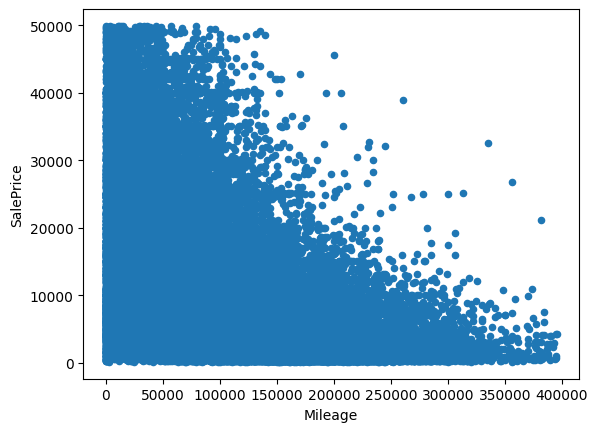

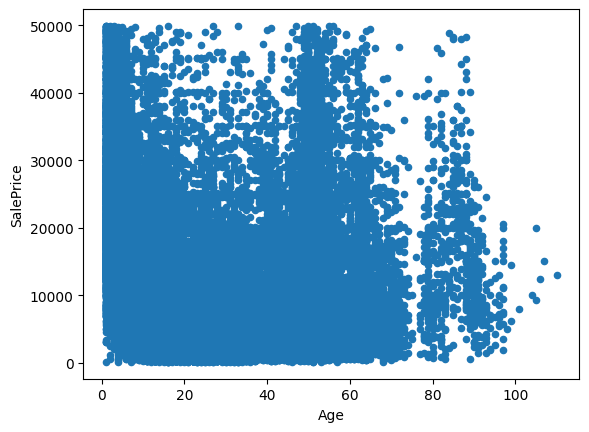

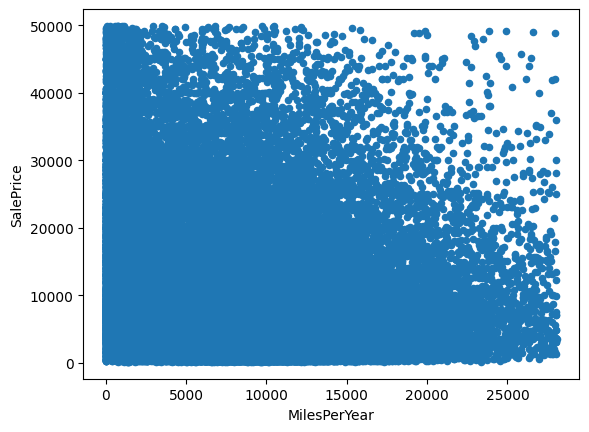

In [60]:
# Mileage outlier doesn't make sense - ~200000 miles per year
cars = cars.drop(highestMPY.ID)

# More Outliers
pre_outliers_size = len(cars)
cars = cars[(np.abs(stats.zscore(cars[["SalePrice", "Mileage", "MilesPerYear"]])) < 3).all(axis=1)]
print(f"Removed {pre_outliers_size-len(cars)} outliers")

cars.plot.scatter(x="Mileage", y="SalePrice")
cars.plot.scatter(x="Age", y="SalePrice")
cars.plot.scatter(x="MilesPerYear", y="SalePrice")

In [61]:
# Zip Code Table for additional location data
zipcodes = pd.read_csv("data/zip_code_database.csv")
print(zipcodes.dtypes)

zip                           int64
type                         object
decommissioned                int64
primary_city                 object
acceptable_cities            object
unacceptable_cities          object
state                        object
county                       object
timezone                     object
area_codes                   object
world_region                 object
country                      object
latitude                    float64
longitude                   float64
irs_estimated_population      int64
dtype: object


In [62]:
# Select only rows pertaining to US zipcodes
zipcodes = zipcodes.dropna(subset=["zip", "state", "country", "county"])
zipcodes = zipcodes[zipcodes["country"].str.contains("US")]

# Select useful columns
zipcodes = zipcodes[["zip", "state", "county", "latitude", "longitude"]]
zipcodes = zipcodes.rename(columns={"zip":"Zip", "state":"State", "county":"County","latitude":"Latitude", "longitude":"Longitude"})

# String formatting
string_columns = zipcodes.select_dtypes(["object"])
zipcodes[string_columns.columns] = string_columns.apply(lambda s: s.str.strip()).apply(lambda s: s.str.upper())

# Format zip column in car sales dataset
cars["Zip"] = cars["Zip"].apply(lambda x: str(x).rstrip(r"[*]"))
zipcodes["Zip"] = zipcodes["Zip"].apply(lambda s: str(s))

# Create different sample to perform location based analysis, remove zipcode from main dataset
cars = cars[cars["Zip"].str.len() == 5]
# cars = cars[["ID", "SalePrice", "YearSold", "Mileage", "Make", "Model", "Year", "Engine", "VehicleClass", "Drive"]]

# Merge cars dataframe with zipcodes dataframe
cars = cars.merge(right=zipcodes, how="left", left_on="Zip", right_on="Zip")
cars = cars.dropna(subset=["State"])

In [63]:
# Some EDA on car sales in different states:
print("Car Sales in New York:")
carsWithZipNY = cars[cars["State"] == "NY"]
carsWithZipNY.describe()

Car Sales in New York:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,Age,MilesPerYear,Latitude,Longitude
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,60058.163171,8889.563758,2019.080117,93226.606124,1995.101930,6.652685,23.981544,6520.737619,41.517773,-74.563121
std,32979.411545,8515.129187,0.317154,57162.383206,17.856638,1.619025,17.845718,5344.398983,1.032109,1.679011
min,8.000000,150.000000,2018.000000,49.000000,1923.000000,2.000000,1.000000,1.063830,40.510000,-79.710000
25%,34287.500000,3050.000000,2019.000000,52000.000000,1985.000000,6.000000,11.000000,1937.515152,40.720000,-74.500000
50%,63187.000000,6100.000000,2019.000000,86724.000000,2002.000000,6.000000,17.000000,5400.000000,40.920000,-73.910000
75%,86589.250000,11900.000000,2019.000000,127409.500000,2008.000000,8.000000,34.000000,9966.058824,42.322500,-73.630000
max,129218.000000,49890.000000,2020.000000,384150.000000,2020.000000,12.000000,96.000000,27924.600000,44.990000,-72.190000


In [64]:
print("Car Sales in California:")
carsWithZipCA = cars[cars["State"] == "CA"]
carsWithZipCA.describe()

Car Sales in California:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,Age,MilesPerYear,Latitude,Longitude
count,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000,7098.000000
mean,65228.833052,5730.984784,2019.106650,130715.115807,1994.615526,6.222175,24.492251,7583.710067,34.609103,-118.561493
std,35719.157138,7864.250576,0.350178,69630.211253,15.195823,1.706135,15.180053,5190.949497,1.703092,1.558418
min,7.000000,110.000000,2018.000000,20.000000,1922.000000,2.000000,1.000000,0.370370,32.550000,-124.160000
25%,33794.750000,950.000000,2019.000000,81288.000000,1989.000000,4.000000,14.000000,3097.887987,33.780000,-118.410000
50%,64941.500000,2550.000000,2019.000000,129000.000000,2000.000000,6.000000,19.000000,7300.426747,33.780000,-117.860000
75%,100592.750000,7000.000000,2019.000000,176000.000000,2005.000000,8.000000,31.000000,10863.716667,34.170000,-117.860000
max,129509.000000,49900.000000,2020.000000,392668.000000,2019.000000,12.000000,97.000000,28000.000000,41.780000,-115.190000


In [65]:
print("Car Sales in Texas:")
carsWithZipTX = cars[cars["State"] == "TX"]
carsWithZipTX.describe()

Car Sales in Texas:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,Age,MilesPerYear,Latitude,Longitude
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,57489.737683,16991.603806,2019.073055,72656.651716,2001.572545,6.464832,17.524295,7928.448863,30.675889,-96.674825
std,34559.319985,12557.459169,0.327368,63284.158369,18.882857,1.658887,18.858917,5924.616729,1.719630,1.882564
min,48.000000,130.000000,2018.000000,12.000000,1926.000000,2.000000,1.000000,0.226415,25.920000,-106.610000
25%,29569.500000,6100.000000,2019.000000,23154.000000,1993.000000,6.000000,3.000000,2675.000000,29.620000,-97.300000
50%,55762.000000,14470.000000,2019.000000,52580.000000,2009.000000,6.000000,10.000000,7238.250000,29.770000,-95.680000
75%,84239.000000,25955.000000,2019.000000,106712.500000,2016.000000,8.000000,26.000000,11884.150000,32.660000,-95.560000
max,129386.000000,49900.000000,2020.000000,383000.000000,2020.000000,12.000000,93.000000,28011.000000,36.190000,-93.750000


In [66]:
print("Car Sales in Kansas:")
carsWithZipKS = cars[cars["State"] == "KS"]
carsWithZipKS.describe()

Car Sales in Kansas:


,ID,SalePrice,YearSold,Mileage,Year,Cylinders,Age,MilesPerYear,Latitude,Longitude
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,56328.614458,11999.959839,2019.044177,84666.008032,1987.381526,6.875502,31.662651,5393.367203,38.229719,-96.591566
std,32560.363363,11336.409495,0.287607,62001.283365,21.938399,1.463453,21.943996,5537.079856,0.677550,1.509198
min,175.000000,140.000000,2018.000000,99.000000,1927.000000,4.000000,1.000000,1.076087,37.020000,-101.350000
25%,28815.000000,3050.000000,2019.000000,34500.000000,1969.000000,6.000000,12.000000,1258.620690,37.700000,-97.310000
50%,56167.000000,8200.000000,2019.000000,76000.000000,1988.000000,8.000000,31.000000,3086.533333,37.960000,-97.170000
75%,83715.000000,18500.000000,2019.000000,118500.000000,2007.000000,8.000000,50.000000,8810.000000,38.880000,-95.210000
max,126660.000000,49500.000000,2020.000000,311361.000000,2018.000000,12.000000,92.000000,27985.000000,39.840000,-94.620000


In [67]:
# Additional Cleaning I left out in the previous phase

accepted_classes = ["BUS", "CONVERTIBLE", "COUPE", "HATCHBACK", "MINIVAN", "PICKUP", "SEDAN", "TRUCK", "SUV", "WAGON", "VAN", "OTHER"]
cars = cars[cars["VehicleClass"].isin(accepted_classes)]
cars.to_csv("data/clean_car_sales.csv")
cars.describe()

,ID,SalePrice,YearSold,Mileage,Year,Cylinders,Age,MilesPerYear,Latitude,Longitude
count,30472.000000,30472.000000,30472.000000,30472.000000,30472.000000,30472.000000,30472.000000,30472.000000,30472.000000,30472.000000
mean,59925.350453,9649.152665,2019.091133,96820.865319,1995.965641,6.371029,23.133106,7041.659308,36.691826,-92.792551
std,34390.946917,9719.236969,0.331173,63557.850449,18.040371,1.682262,18.022177,5523.016783,5.319548,16.365218
min,1.000000,110.000000,2018.000000,11.000000,1914.000000,2.000000,1.000000,0.277778,19.100000,-158.020000
25%,31668.500000,2600.000000,2019.000000,47503.750000,1986.000000,5.000000,10.000000,2174.922619,33.740000,-111.710000
50%,59724.000000,6250.000000,2019.000000,90000.000000,2002.000000,6.000000,17.000000,6104.881579,37.500000,-84.775000
75%,88933.250000,13500.000000,2019.000000,137696.250000,2009.000000,8.000000,34.000000,10588.903743,40.950000,-80.340000
max,129509.000000,49900.000000,2020.000000,390000.000000,2020.000000,12.000000,105.000000,28025.000000,61.620000,-72.190000


In [68]:
"""Project Phase 2"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances



0.2795840900575711

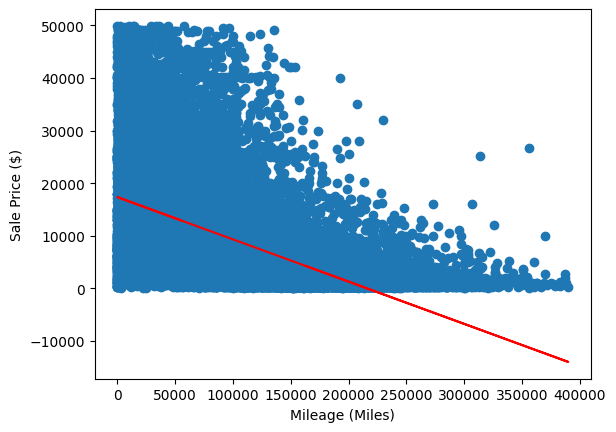

In [69]:
# Model 1 - Linear Regression
# Goal: Determine the trend in mileage as car year changes to predict a normal mileage for a car given its age

x = cars["Mileage"].values.reshape(-1, 1)
y = cars["SalePrice"].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
plt.scatter(x, y)
plt.xlabel("Mileage (Miles)")
plt.ylabel("Sale Price ($)")
plt.plot(x, model.predict(x), color="red")
model.score(x_test, y_test)

-0.0007443755529124019

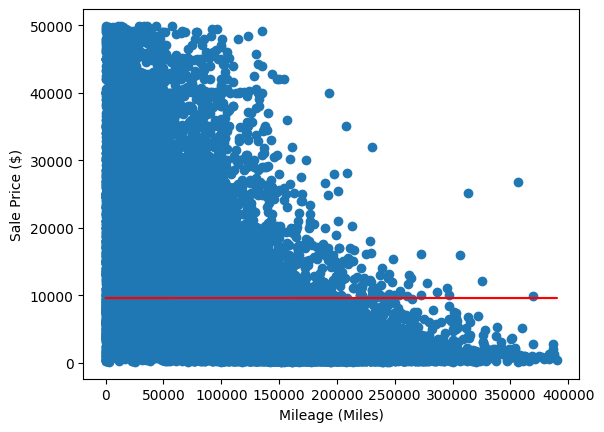

In [70]:
# Adapt fit to only predict positive values of sale price (unless you would get paid to buy a car with a lot of miles on it)

model = LinearRegression(positive=True)
model.fit(x_train, y_train)
plt.scatter(x, y)
plt.xlabel("Mileage (Miles)")
plt.ylabel("Sale Price ($)")
plt.plot(x, model.predict(x), color="red")
model.score(x_test, y_test)

0.024565428708695936

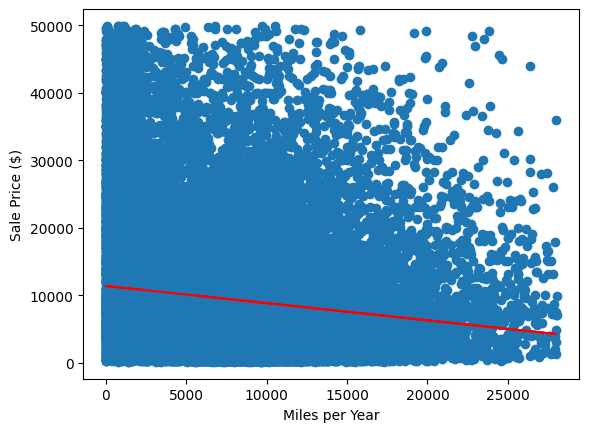

In [71]:
# Model only predicts positive sale prices but not the fit is really bad
# Maybe we can instead establish a relationship between SalePrice and MilesPerYear

x = cars["MilesPerYear"].values.reshape(-1, 1)
y = cars["SalePrice"].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
plt.scatter(x, y)
plt.plot(x, model.predict(x), color="red")
plt.xlabel("Miles per Year")
plt.ylabel("Sale Price ($)")
model.score(x_test, y_test)

In [72]:
cars["VehicleClass"].value_counts()

SEDAN          8217
SUV            7549
COUPE          7295
CONVERTIBLE    4428
WAGON          1099
HATCHBACK      1064
MINIVAN         442
PICKUP          141
VAN             106
TRUCK           102
OTHER            20
BUS               9
Name: VehicleClass, dtype: int64

-0.0008908206814324249

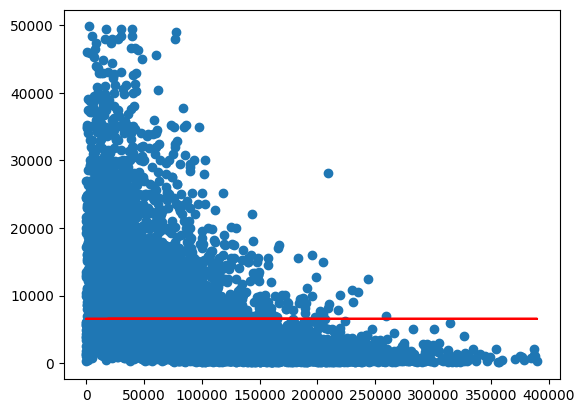

In [73]:
sedans = cars[cars["VehicleClass"] == "SEDAN"]
x = sedans["Mileage"].values.reshape(-1, 1)
y = sedans["SalePrice"].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=26)

model = LinearRegression(positive=True)
model.fit(x_train, y_train)
plt.scatter(x, y)
plt.plot(x, model.predict(x), color="red")
model.score(x_test, y_test)

-0.00015468069012447572

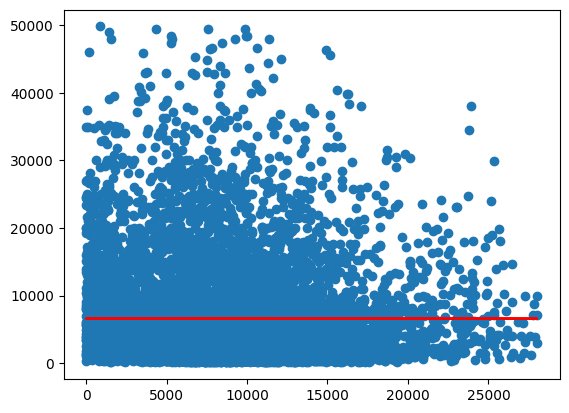

In [74]:
x = sedans["MilesPerYear"].values.reshape(-1, 1)
y = sedans["SalePrice"].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=31)

model = LinearRegression(positive=True)
model.fit(x_train, y_train)
plt.scatter(x, y)
plt.plot(x, model.predict(x), color="red")
model.score(x_test, y_test)

c:\users\brian\pycharmprojects\cse487\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Car Age (year)')

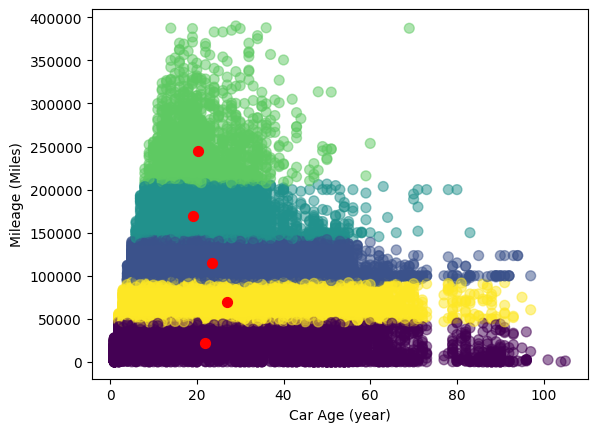

In [75]:
# Model 2 - KMeans
# Goal: Cluster car sales based on mileage and year

kmeans = KMeans(n_clusters=5).fit(cars[["Age", "Mileage"]])
plt.scatter(cars["Age"], cars["Mileage"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", s=50)
plt.ylabel("Mileage (Miles)")
plt.xlabel("Car Age (year)")

c:\users\brian\pycharmprojects\cse487\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Car Age (year)')

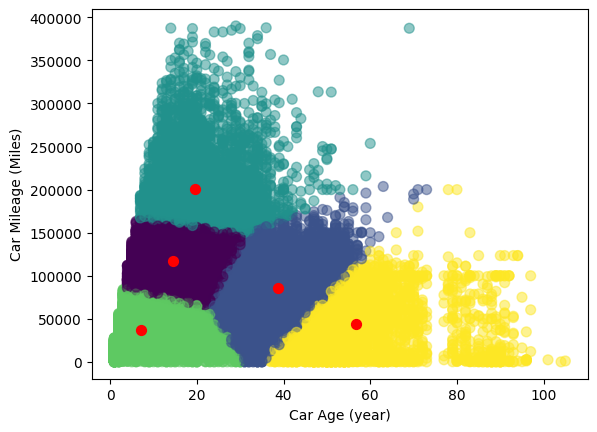

In [76]:
# Clustering happened without regard for the year, only sale price
# We need to scale the data

scaler = StandardScaler()
scaled_cars = pd.DataFrame(scaler.fit_transform(cars[["Age", "Mileage"]]), columns=["Age", "Mileage"])
kmeans = KMeans(n_clusters=5).fit(scaled_cars)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(cars["Age"], cars["Mileage"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)
plt.ylabel("Car Mileage (Miles)")
plt.xlabel("Car Age (year)")

In [77]:
# Some info about the clusters

cars["Cluster"] = np.array(kmeans.labels_)
for i in range(0,5):
    print(f"Cluster #{i+1}")
    cluster_data = cars[cars["Cluster"] == i].copy()
    print(cluster_data.drop(["Cluster", "ID", "MilesPerYear", "YearSold", "Age", "Latitude", "Longitude"], axis=1).describe())

Cluster #1
          SalePrice        Mileage         Year    Cylinders
count   8721.000000    8721.000000  8721.000000  8721.000000
mean    5627.986469  116990.821007  2004.603830     6.173833
std     5416.440983   24060.151831     5.515036     1.644719
min      150.000000   64791.000000  1988.000000     2.000000
25%     2030.000000   97000.000000  2001.000000     4.000000
50%     4050.000000  116800.000000  2005.000000     6.000000
75%     7500.000000  137489.000000  2008.000000     8.000000
max    49000.000000  165500.000000  2016.000000    12.000000
Cluster #2
         SalePrice        Mileage         Year    Cylinders
count   5324.00000    5324.000000  5324.000000  5324.000000
mean    8554.47408   86399.266153  1980.380541     6.965440
std     7978.60565   31898.545849     8.182392     1.632589
min      160.00000      95.000000  1946.000000     2.000000
25%     3337.50000   65453.000000  1973.000000     6.000000
50%     6100.00000   87182.500000  1981.000000     8.000000
75%    10

In [78]:
# Return to linear regression
# Perform linear regression on the light blue cluster (bottom left)


new_low_miles = cars[cars["Cluster"]==2]
new_low_miles.describe()

,ID,SalePrice,YearSold,Mileage,Year,Cylinders,Age,MilesPerYear,Latitude,Longitude,Cluster
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.0
mean,62578.485323,2913.473581,2019.103523,201010.226614,1999.425832,6.015656,19.677691,11547.209297,36.205329,-98.440614,2.0
std,35533.436378,3326.930801,0.342762,38765.207552,7.361182,1.587825,7.362389,4438.142850,4.413406,18.334916,0.0
min,58.000000,110.000000,2018.000000,148401.000000,1950.000000,2.000000,7.000000,3571.428571,19.100000,-157.880000,2.0
25%,31988.500000,820.000000,2019.000000,172966.250000,1995.000000,4.000000,14.000000,8213.300000,33.780000,-117.860000,2.0
50%,61762.000000,1850.000000,2019.000000,190000.000000,2001.000000,6.000000,18.000000,11090.916667,34.240000,-95.130000,2.0
75%,96604.500000,3700.000000,2019.000000,218994.250000,2005.000000,8.000000,24.000000,14138.083333,39.920000,-81.010000,2.0
max,129350.000000,40000.000000,2020.000000,390000.000000,2013.000000,12.000000,69.000000,27999.500000,61.620000,-72.390000,2.0


In [79]:
# Compare against a linear regression
X, y = new_low_miles[["Age", "Mileage"]], new_low_miles["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

linear = LinearRegression()
linear.fit(X_train, y_train)
linear_predicted = linear.predict(X_test)
print("Linear Regression")
print(f"    Error: {np.sqrt(mean_squared_error(y_test, linear_predicted))}")
print(f"    R^2: {linear.score(X_test, y_test)}")

Linear Regression
    Error: 3176.727924311729
    R^2: 0.04199423541150127


c:\users\brian\pycharmprojects\cse487\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


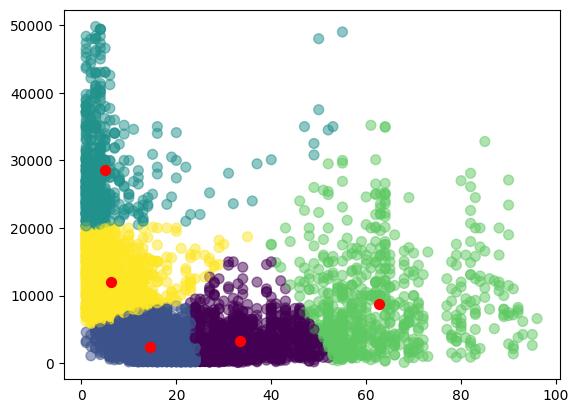

In [80]:
# KMeans on just sedans

scaler = StandardScaler()
scaled_sedans = pd.DataFrame(scaler.fit_transform(sedans[["Age", "SalePrice"]]), columns=["Age", "SalePrice"])
kmeans = KMeans(n_clusters=5).fit(scaled_sedans)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(sedans["Age"], sedans["SalePrice"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)

R^2 score: 0.42911156800770434


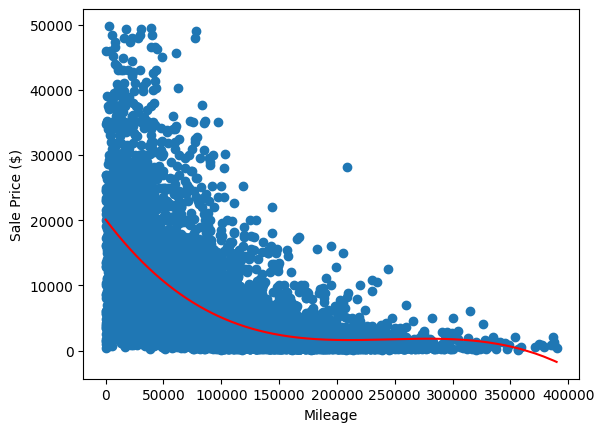

In [81]:
# Model 3 - Polynomial Regression

x = sedans["Mileage"].values
y = sedans["SalePrice"].values
order = np.argsort(x)
x = np.array(x)[order].reshape(-1, 1)
y = np.array(y)[order].reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=50)

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
poly_x = poly.fit_transform(x)
model = LinearRegression()
model.fit(poly_x_train, y_train)
x_predict = model.predict(poly_x)

# Viz
plt.scatter(x, y)
plt.plot(x, x_predict, color="red")
plt.xlabel("Mileage")
plt.ylabel("Sale Price ($)")

# Assessment
print(f"R^2 score: {model.score(poly_x_test, y_test)}")

0.41253698617246504

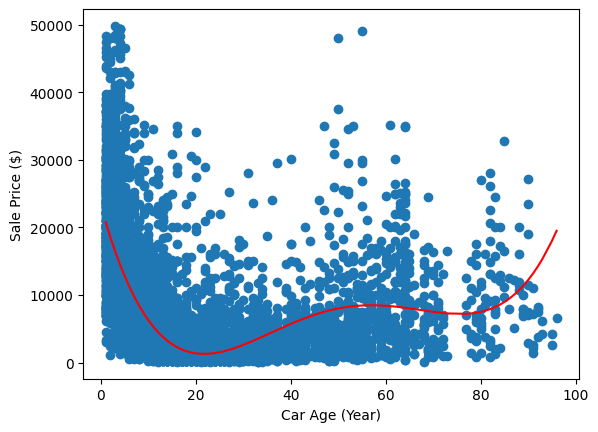

In [82]:
# Polynomial Regression on Age vs. Saleprice

x = sedans["Age"].values
y = sedans["SalePrice"].values
order = np.argsort(x)
x = np.array(x)[order].reshape(-1, 1)
y = np.array(y)[order].reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=39)

poly = PolynomialFeatures(degree=4, include_bias=False)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
poly_x = poly.fit_transform(x)
model = LinearRegression()
model.fit(poly_x_train, y_train)

plt.scatter(x, y)
plt.plot(x, model.predict(poly_x), color="red")
plt.xlabel("Car Age (Year)")
plt.ylabel("Sale Price ($)")
model.score(poly_x_test, y_test)

In [83]:
# Now try a polynomial regression on multiple features
X, y = sedans[["Age", "Mileage"]], sedans["SalePrice"]

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_feat = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=45)
polynomial_3_model = LinearRegression()
polynomial_3_model.fit(X_train, y_train)
predicted = polynomial_3_model.predict(X_test)
print("Degree 3 Polynomial regression")
print(f"    Error: {np.sqrt(mean_squared_error(y_test, predicted))}")
print(f"    R^2: {polynomial_3_model.score(X_test, y_test)}")

# Compare against a linear regression
X, y = sedans[["Age", "Mileage"]], sedans["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

linear = LinearRegression()
linear.fit(X_train, y_train)
linear_predicted = linear.predict(X_test)
print("Linear Regression")
print(f"    Error: {np.sqrt(mean_squared_error(y_test, linear_predicted))}")
print(f"    R^2: {linear.score(X_test, y_test)}")

Degree 3 Polynomial regression
    Error: 5267.766142593633
    R^2: 0.5323994227095723
Linear Regression
    Error: 6186.167140729673
    R^2: 0.35514010980007626


In [84]:
cars.dtypes

ID                int64
SalePrice         int64
YearSold          int64
Zip              object
Mileage           int64
Make             object
Model            object
Year              int64
Trim             object
Engine           object
VehicleClass     object
Cylinders         int64
Drive            object
Age               int64
MilesPerYear    float64
State            object
County           object
Latitude        float64
Longitude       float64
Cluster           int32
dtype: object

In [85]:
# Model 4 - KNN for classification of a vehicle class

# VehicleClass will be he labels
y = cars["VehicleClass"]

# Some of the features will be ignored for classification
x = cars[["Mileage", "Year", "MilesPerYear", "Cylinders", "Longitude", "Latitude"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.3460225781044894

In [86]:
predicted = classifier.predict(x_test)
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

         BUS       0.00      0.00      0.00         3
 CONVERTIBLE       0.25      0.30      0.27      1115
       COUPE       0.40      0.47      0.43      1823
   HATCHBACK       0.11      0.04      0.06       253
     MINIVAN       0.04      0.01      0.02       108
       OTHER       0.00      0.00      0.00         4
      PICKUP       0.00      0.00      0.00        32
       SEDAN       0.35      0.37      0.36      2104
         SUV       0.38      0.36      0.37      1844
       TRUCK       0.00      0.00      0.00        20
         VAN       0.00      0.00      0.00        23
       WAGON       0.00      0.00      0.00       289

    accuracy                           0.35      7618
   macro avg       0.13      0.13      0.13      7618
weighted avg       0.32      0.35      0.33      7618



In [87]:
# Try again with data scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.4062746127592544

In [88]:
predicted = classifier.predict(x_test)
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

         BUS       0.00      0.00      0.00         3
 CONVERTIBLE       0.28      0.31      0.29      1115
       COUPE       0.44      0.51      0.47      1823
   HATCHBACK       0.13      0.09      0.10       253
     MINIVAN       0.26      0.16      0.20       108
       OTHER       0.00      0.00      0.00         4
      PICKUP       0.00      0.00      0.00        32
       SEDAN       0.41      0.44      0.42      2104
         SUV       0.49      0.47      0.48      1844
       TRUCK       0.50      0.05      0.09        20
         VAN       0.00      0.00      0.00        23
       WAGON       0.08      0.01      0.02       289

    accuracy                           0.41      7618
   macro avg       0.22      0.17      0.17      7618
weighted avg       0.39      0.41      0.40      7618



In [89]:
# Test different values of nearest neighbors
acc1 = []
for i in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    acc1.append(classifier.score(x_test, y_test))

Max Accuracy for k=78: 46.02257810448937%


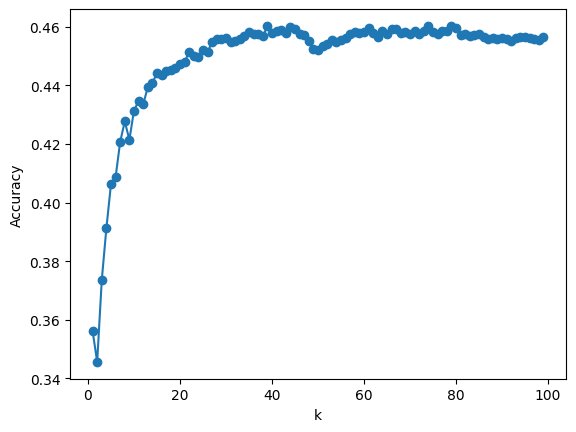

In [90]:
plt.plot(range(1,100), acc1, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
print(f"Max Accuracy for k={acc1.index(max(acc1))}: {max(acc1)*100}%")

In [91]:
# Try KNN on one of the clusters from KMeans

y = new_low_miles["VehicleClass"]
x = new_low_miles[["MilesPerYear", "Mileage", "Year", "Longitude", "Latitude"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=55)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
acc2 = []
for i in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    acc2.append(classifier.score(x_test, y_test))

Max Accuracy for k=98: 46.087636932707355%


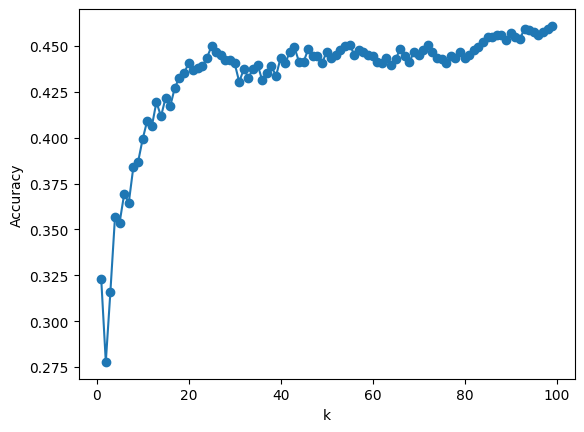

In [92]:
plt.plot(range(1,100), acc2, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
print(f"Max Accuracy for k={acc2.index(max(acc2))}: {max(acc2)*100}%")

In [93]:
# Model 5 - BSCAN for Clustering

radians = cars[["Latitude", "Longitude"]].apply(np.radians).values
kilometers = haversine_distances(radians) * 6371


model = DBSCAN(metric="precomputed", eps=1, min_samples=2)
model.fit(kilometers)

DBSCAN(eps=1, metric='precomputed', min_samples=2)

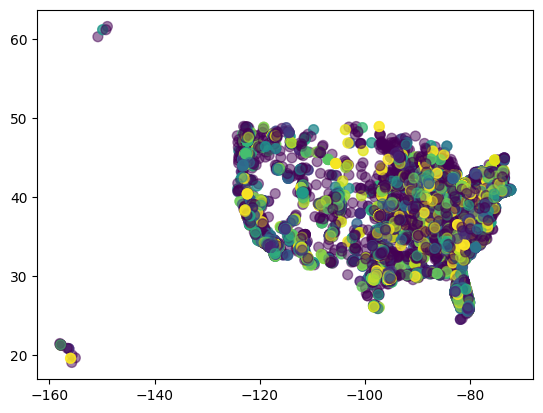

In [94]:
clusters = model.labels_
plt.scatter(cars["Longitude"], cars["Latitude"], c=clusters.astype(float), s=50, alpha=0.5)

In [95]:
# coordinates = cars.as_matrix(columns=["Latitude", "Latitude"])
# model = DBSCAN(eps=1.5/6371, min_samples=1, algorithm="ball_tree", metric="haversine").fit(np.radians(coordinates))
# cluster_labels = model.labels_
# num_clusters = len(set(cluster_labels))
# clusters = pd.Series([coordinates[cluster_labels == n] for n in range(num_clusters)])



In [96]:
"""
Project Phase 3
"""

'\nProject Phase 3\n'

In [105]:
# use pickle to save models for use in the streamlit script
import pickle

pickle.dump(polynomial_3_model, open("models/polynomial_3_model.sav", "wb"))

# save the cleaned dataframe to a csv file
cars.to_csv("data/clean_data.csv")